## Multi-arm bandit
---
**Elo notes**

In probability theory, the multi-armed bandit problem (sometimes called the K- or N-armed bandit problem) is a problem in which a gambler at a row of slot machines (sometimes known as "one-armed bandits") has to decide which machines to play, how many times to play each machine and in which order to play them. When played, each machine provides a random reward from a probability distribution specific to that machine. The objective of the gambler is to maximize the sum of rewards earned through a sequence of lever pulls.

In practice, multi-armed bandits have been used to model the problem of managing research projects in a large organization, like a science foundation or a pharmaceutical company. Given a fixed budget, the problem is to allocate resources among the competing projects, whose properties are only partially known at the time of allocation, but which may become better understood as time passes.

In early versions of the multi-armed bandit problem, the gambler has no initial knowledge about the machines. The crucial tradeoff the gambler faces at each trial is between "exploitation" of the machine that has the highest expected payoff and "exploration" to get more information about the expected payoffs of the other machines. The trade-off between exploration and exploitation is also faced in reinforcement learning.

The multi-armed bandit problem models an agent that simultaneously attempts to acquire new knowledge (called "exploration") and optimize his or her decisions based on existing knowledge (called "exploitation"). The agent attempts to balance these competing tasks in order to maximize his total value over the period of time considered. There are many practical applications of the bandit model, for example:

clinical trials investigating the effects of different experimental treatments while minimizing patient losses, adaptive routing efforts for minimizing delays in a network,
portfolio design.

In these practical examples, the problem requires balancing reward maximization based on the knowledge already acquired with attempting new actions to further increase knowledge. This is known as the exploitation vs. exploration tradeoff in reinforcement learning.

The model has also been used to control dynamic allocation of resources to different projects, answering the question of which project to work on, given uncertainty about the difficulty and payoff of each possibility.


#### The multi-armed bandit model

The multi-armed bandit (short: bandit) can be seen as a set of real distributions ${\displaystyle B=\{R_{1},\dots ,R_{K}\}}$, 

Each distribution being associated with the rewards delivered by one of the $ {\displaystyle K\in \mathbb {N} ^{+}} $ levers. 

Let ${\displaystyle \mu _{1},\dots ,\mu _{K}} $ be the mean values associated with these reward distributions. The gambler iteratively plays one lever per round and observes the associated reward. The objective is to maximize the sum of the collected rewards. 

The horizon ${\displaystyle H} $ is the number of rounds that remain to be played. The bandit problem is formally equivalent to a one-state Markov decision process. 


The regret ${\displaystyle \rho }$ after ${\displaystyle T}$ rounds is defined as the expected difference between the reward sum associated with an optimal strategy and the sum of the collected rewards: ${\displaystyle \rho =T\mu ^{*}-\sum _{t=1}^{T}{\widehat {r}}_{t}} $

where 

${\displaystyle \mu ^{*}} $ is the maximal reward mean, 

${\displaystyle \mu ^{*}=\max _{k}\{\mu _{k}\}}$, and ${\displaystyle {\widehat {r}}_{t}}$ is the reward at time t.

A zero-regret strategy is a strategy whose average regret per round ${\displaystyle \rho /T}$ tends to zero with probability 1 when the number of played rounds tends to infinity. Intuitively, zero-regret strategies are guaranteed to converge to a (not necessarily unique) optimal strategy if enough rounds are played.

#### Variations


A common formulation is the Binary multi-armed bandit or Bernoulli multi-armed bandit, which issues a reward of one with probability ${\displaystyle p} $, and otherwise a reward of zero.

Another formulation of the multi-armed bandit has each arm representing an independent Markov machine. Each time a particular arm is played, the state of that machine advances to a new one, chosen according to the Markov state evolution probabilities. There is a reward depending on the current state of the machine. In a generalisation called the "restless bandit problem", the states of non-played arms can also evolve over time. There has also been discussion of systems where the number of choices (about which arm to play) increases over time.

Computer science researchers have studied multi-armed bandits under worst-case assumptions, obtaining algorithms to minimize regret in both finite and infinite (asymptotic) time horizons for both stochastic and non-stochastic arm payoffs.

Later in "Optimal adaptive policies for Markov decision processes"Burnetas and Katehakis studied the much larger model of Markov Decision Processes under partial information, where the transition law and/or the expected one period rewards may depend on unknown parameters. In this work the explicit form for a class of adaptive policies that possess uniformly maximum convergence rate properties for the total expected finite horizon reward, were constructed under sufficient assumptions of finite state-action spaces and irreducibility of the transition law. A main feature of these policies is that the choice of actions, at each state and time period, is based on indices that are inflations of the right-hand side of the estimated average reward optimality equations. These inflations have recently been called the optimistic approach in the work of Tewari and Bartlett,Ortner Filippi, Cappé, and Garivier, and Honda and Takemura.

#### Approximate solutions

Many strategies exist which provide an approximate solution to the bandit problem, and can be put into the four broad categories detailed below.
Semi-uniform strategies

Semi-uniform strategies were the earliest (and simplest) strategies discovered to approximately solve the bandit problem. All those strategies have in common a greedy behavior where the best lever (based on previous observations) is always pulled except when a (uniformly) random action is taken.

- Epsilon-greedy strategy: The best lever is selected for a proportion ${\displaystyle 1-\epsilon }$ of the trials, and a lever is selected at random (with uniform probability) for a proportion ${\displaystyle \epsilon } $. A typical parameter value might be ${\displaystyle \epsilon =0.1}$, but this can vary widely depending on circumstances and predilections.
- Epsilon-first strategy: A pure exploration phase is followed by a pure exploitation phase. For ${\displaystyle N}$ trials in total, the exploration phase occupies ${\displaystyle \epsilon N} $ trials and the exploitation phase ${\displaystyle (1-\epsilon )N} $ trials. During the exploration phase, a lever is randomly selected (with uniform probability); during the exploitation phase, the best lever is always selected.
- Epsilon-decreasing strategy: Similar to the epsilon-greedy strategy, except that the value of $ {\displaystyle \epsilon }$ decreases as the experiment progresses, resulting in highly explorative behaviour at the start and highly exploitative behaviour at the finish.
- Adaptive epsilon-greedy strategy based on value differences (VDBE): Similar to the epsilon-decreasing strategy, except that epsilon is reduced on basis of the learning progress instead of manual tuning (Tokic, 2010). High fluctuations in the value estimates lead to a high epsilon (high exploration, low exploitation); low fluctuations to a low epsilon (low exploration, high exploitation). Further improvements can be achieved by a softmax-weighted action selection in case of exploratory actions (Tokic & Palm, 2011).
- Contextual-Epsilon-greedy strategy: Similar to the epsilon-greedy strategy, except that the value of ${\displaystyle \epsilon }$ is computed regarding the situation in experiment processes, which let the algorithm be Context-Aware. It is based on dynamic exploration/exploitation and can adaptively balance the two aspects by deciding which situation is most relevant for exploration or exploitation, resulting in highly explorative behavior when the situation is not critical and highly exploitative behavior at critical situation.

#### Probability matching strategies

Probability matching strategies reflect the idea that the number of pulls for a given lever should match its actual probability of being the optimal lever. Probability matching strategies are also known as Thompson sampling or Bayesian Bandits,[29] and surprisingly easy to implement if you can sample from the posterior for the mean value of each alternative.

Probability matching strategies also admit solutions to so-called contextual bandit problems.
Pricing strategies

Pricing strategies establish a price for each lever. For example, as illustrated with the POKER algorithm, the price can be the sum of the expected reward plus an estimation of extra future rewards that will gain through the additional knowledge. The lever of highest price is always pulled.

#### Strategies with ethical constraints

These strategies minimize the assignment of any patient to an inferior arm ("physician's duty"). In a typical case, they minimize expected successes lost (ESL), that is, the expected number of favorable outcomes that were missed because of assignment to an arm later proved to be inferior. Another version minimizes resources wasted on any inferior, more expensive, treatment


In [64]:
from __future__ import division 
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plot

from bandits import Bandits
from Multiarm_elo import BanditStrategy, max_mean, random_choice, epsilon_greedy, softmax, ucb1, bayesian_bandit, regret


% matplotlib inline
% autoreload 2


In [71]:
def run_of_functions(bandit_list, function, num_trials):
    bandits = Bandits(bandit_list)
    strategy = BanditStrategy(bandits, function)
    strategy.sample_bandits(num_trials)
    strategy.plot_optimal_bandit()
    print 'The strategy is:', function
    print 'Number of wins:{}, Number of trials:{}'.format(strategy.wins, strategy.trials)
    print 'Convertion Rate:', strategy.wins / strategy.trials
    print '***A total of {} wins of {} trials***'.format(strategy.wins.sum(), strategy.trials.sum())
    
    

Slot machines (bandits): [0.05, 0.03, 0.06]
The strategy is: <function random_choice at 0x108dbc500>
Number of wins:[ 20.  11.  19.], Number of trials:[ 317.  359.  324.]
Convertion Rate: [ 0.06309148  0.03064067  0.05864198]
***A total of 50.0 wins of 1000.0 trials***
The strategy is: <function max_mean at 0x108dbcde8>
Number of wins:[  0.  36.   0.], Number of trials:[   3.  996.    1.]
Convertion Rate: [ 0.          0.03614458  0.        ]
***A total of 36.0 wins of 1000.0 trials***
The strategy is: <function epsilon_greedy at 0x108dbc050>
Number of wins:[ 56.   2.   2.], Number of trials:[ 925.   44.   31.]
Convertion Rate: [ 0.06054054  0.04545455  0.06451613]
***A total of 60.0 wins of 1000.0 trials***
The strategy is: <function softmax at 0x108dbccf8>
Number of wins:[ 53.   0.   0.], Number of trials:[ 934.   27.   39.]
Convertion Rate: [ 0.05674518  0.          0.        ]
***A total of 53.0 wins of 1000.0 trials***
The strategy is: <function ucb1 at 0x108dbc140>
Number of wins

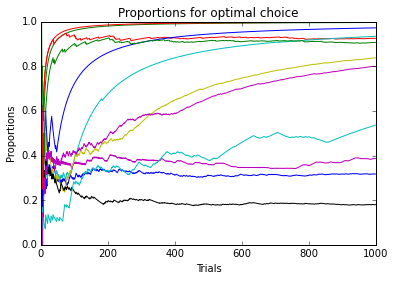

In [74]:
function_list = [random_choice, max_mean, epsilon_greedy, softmax, ucb1, bayesian_bandit]
bandit_list_l = [[0.05, 0.03, 0.06], [0.1, 0.2, 0.3, 0.4, 0.5]]

for bandit in bandit_list_l:
    print '=============================='
    print 'Slot machines (bandits):', bandit
    print '=============================='
    for funct in function_list:
        run_of_functions(bandit, funct, 1000)

In [75]:
# function_list = [random_choice, max_mean, epsilon_greedy, softmax, ucb1, bayesian_bandit]
# bandit_list_l = [[0.05, 0.03, 0.06],[0.1, 0.1, 0.1, 0.1, 0.9],[0.1, 0.1, 0.1, 0.1, 0.12], [0.1, 0.2, 0.3, 0.4, 0.5]]

# for bandit in bandit_list_l:
#     print '=============================='
#     print 'Slot machines (bandits):', bandit
#     print '=============================='
#     for funct in function_list:
#         run_of_functions(bandit, funct, 1000)

In [89]:
def check_paren(string):
    check = True
    if string.count('(') != string.count(')'):
        check = False
    if string.count('[') != string.count(']'):
        check = False
    if string.count('{') != string.count('}'):
        check = False

    return check

In [90]:
check_paren('(a(b))()()')

True

In [92]:
check_paren('a(b())')

True

In [94]:
check_paren(')a(b))')

False

In [95]:
check_paren('(a(b){c}')

False

In [123]:
def evaluating(string):
    if string.count('(') != string.count(')'):
        return False, 'No match found'
    elif string.count('[') != string.count(']'):
        return False, 'No match found'
    elif string.count('{') != string.count('}'):
        return False, 'No match found'
    else:
        return True, 'OK'
    
    

In [186]:
def evaluate(string):
    if string.count('(') != string.count(')'):
        return False, "No match found for '(':{}, ')':{}".format(string.count('('),string.count(')'))
    elif string.count('[') != string.count(']'):
        return False, "No match found for '[': {}, ']':{}".format(string.count('['), string.count(']'))
    elif string.count('{') != string.count('}'):
        return False, "No match found for '{':{}, '}':{}".format(string.count('{}'), string.count('}'))
    else:
        return True, 'OK'
    

In [187]:
evaluate('(a(b))()()') 

(True, 'OK')

In [188]:
evaluate('a(b())')

(True, 'OK')

In [189]:
evaluate(')a(b))')

(False, "No match found for '(':1, ')':3")

In [190]:
evaluate('(a(b){c}')

(False, "No match found for '(':2, ')':1")

In [191]:
evaluate('a(b))))')

(False, "No match found for '(':1, ')':4")

In [192]:
evaluate('(((a(b){c}')

(False, "No match found for '(':4, ')':1")